In [3]:
%load_ext autoreload
%autoreload 2

%matplotlib inline
import matplotlib.pyplot as plt

import sys
import numpy as np
import pandas as pd
import os
import time
import tqdm

from astropy import units as u
from astropy.stats import sigma_clip
import scipy.stats

import blimpy as bl
import setigen as stg
import blscint as bls
import lprofiler as lp

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
%matplotlib inline

In [6]:
fr = stg.Frame.from_backend_params(256, tchans=None, int_factor=51)
fr.get_params(), fr.shape

({'fchans': 256,
  'tchans': 16,
  'df': 2.7939677238464355,
  'dt': 18.253611008,
  'fch1': 8000000000.0,
  'ascending': False},
 (16, 256))

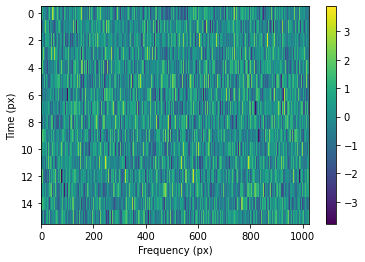

In [7]:
data = np.random.normal(size=(16, 1024))
frame = stg.Frame.from_data(df=2.7939677238464355*u.Hz,
                            dt=18.253611008*u.s,
                            fch1=6095.214842353016*u.MHz,
                            ascending=False,
                            data=data)
frame.plot()

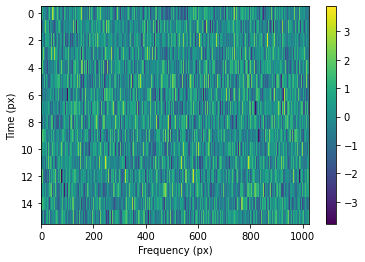

In [11]:
frame = stg.Frame.from_backend_params(data=data)
frame.plot()

In [28]:
stg.get_slice(frame, 400, 600).shape

(16, 200)

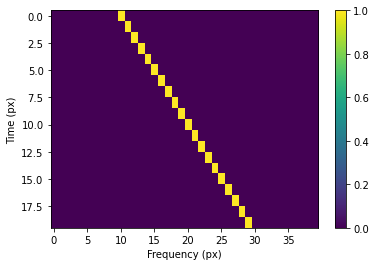

In [3]:
fr = stg.Frame(fchans=40, tchans=20, df=1, dt=1, fch1=0)
fr.add_constant_signal(fr.get_frequency(10), 1, 1, 1, 'box')
fr.plot()

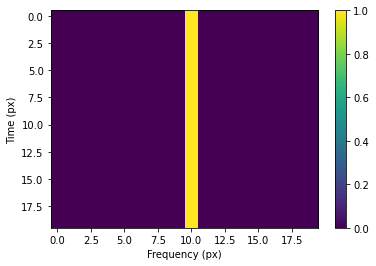

In [4]:
stg.dedrift(fr, 1).plot()

In [5]:
fn = '/datax/scratch/bbrzycki/data/scintillation/blc00_guppi_59299_42346_DIAG_GC_SCINT_L0_B4_0017.rawspec.0000.fil'
dat_file = '/datax/scratch/bbrzycki/data/scintillation/blc00_guppi_59299_42346_DIAG_GC_SCINT_L0_B4_0017.rawspec.0000.dat'

df = bls.make_dataframe(dat_file)
param_dict = bls.get_frame_params(fn)

blimpy.io.base_reader WARNING  Selection size of 16.00 GB, exceeding our size limit 1.00 GB. Instance created, header loaded, but data not loaded, please try another (t,v) selection.


102 158


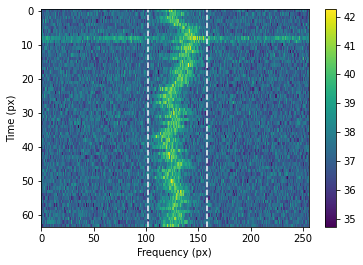

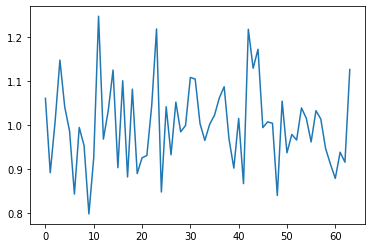

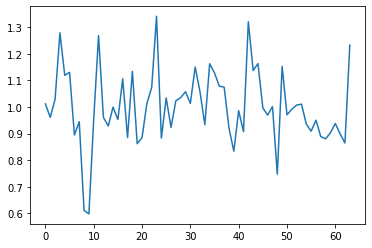

In [9]:
frame = bls.get_centered_frame(45, df, fn)
frame = bls.dedrift_frame(frame)
l, r, _ = bls.threshold_bounds(frame.integrate())
print(l, r)
# r=130
bls.plot_bounds(frame, l, r, use_db=True)
plt.show()
n_frame = bls.t_norm_frame(frame)
tr_frame = n_frame.get_slice(l, r)
ts = tr_frame.integrate('f')
plt.plot(ts/ts.mean())
plt.show()

n_frame1 = stg.sigma_clip_norm(frame, axis=1)
tr_frame1 = stg.get_slice(n_frame1, l, r)
ts1 = stg.integrate(tr_frame1, 1)
plt.plot(ts1/ts1.mean())
plt.show()